# EDA DISEASE

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("../data/Large-data/cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [147]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
negative, positive = df["cardio"].value_counts()

print(f"Negative for cardiovascular disease: {negative}")
print(f"Positive for cardiovascular disease: {positive}")

Negative for cardiovascular disease: 35021
Positive for cardiovascular disease: 34979


In [149]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

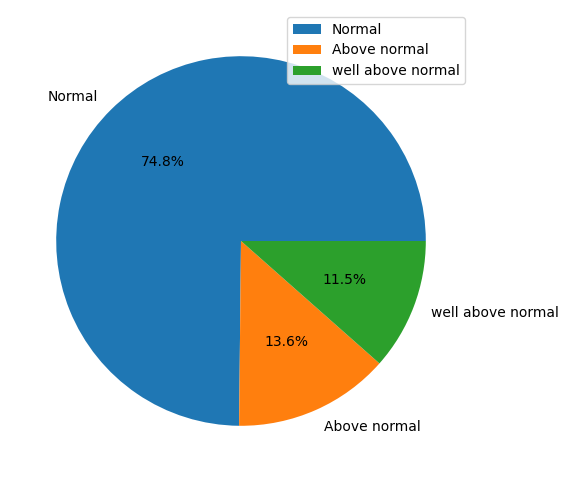

In [150]:
# Piechart for cholesterol levels
fig = plt.subplots(figsize=(10,6))
plt.pie(df["cholesterol"].value_counts(), labels=["Normal", "Above normal", "well above normal"], autopct="%1.1f%%")
plt.legend()

In [151]:
df["age"]

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

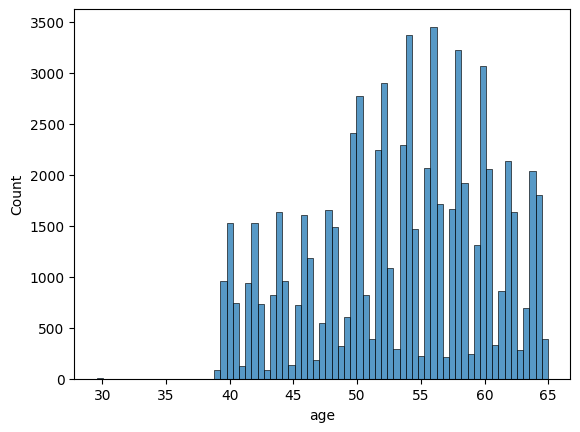

In [152]:
# histplot for age converted to display by year rather than days
sns.histplot(df["age"]/365)

In [153]:
# decided to convert age column to years entirely to make it easier to understand further on
df["age"] = df["age"]/365
df["age"]
# this does make it easier to understand the age of a person but makes it slightly less accurate as it does not account for leapyears so a decimal of .26 years might not be exact

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [154]:
non_smokers, smokers = df["smoke"].value_counts()
smoker_percentage = df["smoke"].mean()

print(f"There are {non_smokers} non smokers and {smokers} smokers")
print(f"{smoker_percentage*100:.2f}% are smokers")

There are 63831 non smokers and 6169 smokers
8.81% are smokers


In [155]:
df["weight"].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

[Text(0.5, 1.0, 'Weight distribution in kg')]

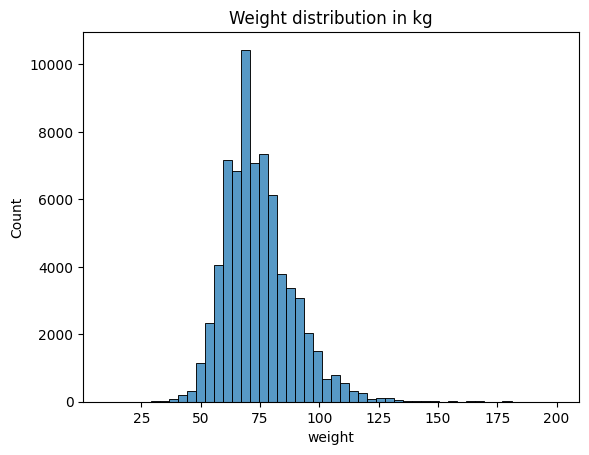

In [156]:
sns.histplot(df["weight"], bins=50).set(title="Weight distribution in kg")

In [157]:
df["height"].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

[Text(0.5, 1.0, 'Height distribution in cm')]

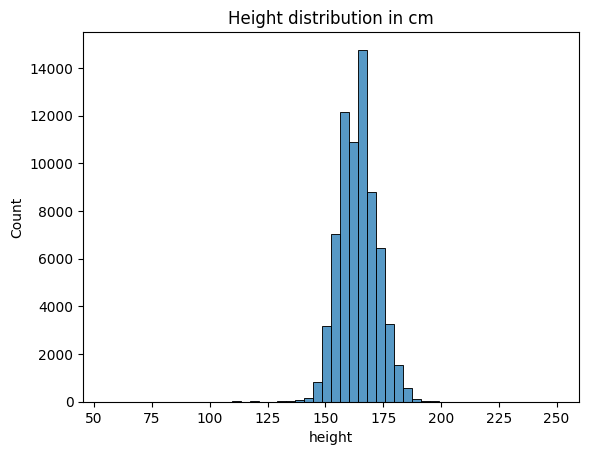

In [158]:
sns.histplot(df["height"], bins=50).set(title="Height distribution in cm")

In [159]:
df_women = df[df["gender"] == 1]
df_men = df[df["gender"] == 2]

df_women

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53.969863,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [160]:
df_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
7,12,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
11,16,51.547945,2,173,60.0,120,80,1,1,0,0,1,0
12,18,40.523288,2,165,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,47.945205,2,182,110.0,130,90,2,2,0,0,1,1
69984,99975,49.112329,2,168,80.0,120,80,1,1,0,0,1,1
69986,99978,49.857534,2,180,78.0,120,80,1,1,0,0,1,0
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0


[Text(0.5, 1.0, 'Mens cardiovascular disease %')]

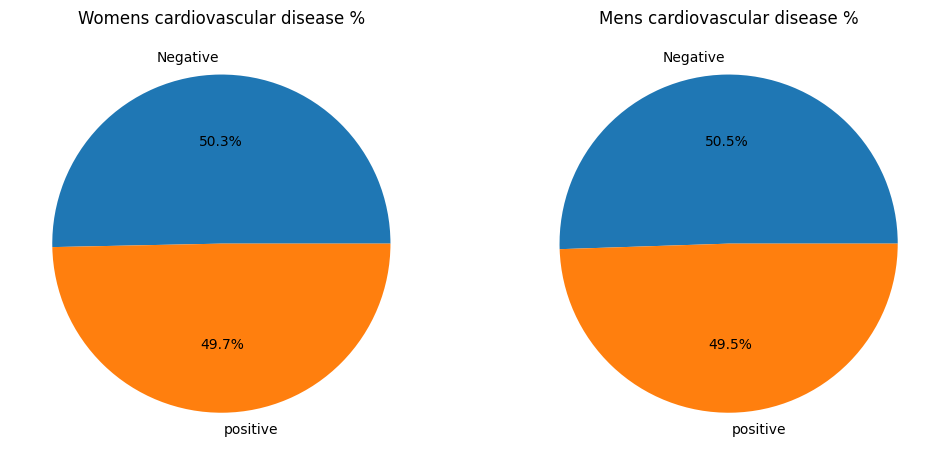

In [161]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.pie(df_women["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")
ax2.pie(df_men["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")

ax1.set(title="Womens cardiovascular disease %")
ax2.set(title="Mens cardiovascular disease %")

## Feature engineering BMI

- based on https://en.wikipedia.org/wiki/Body_mass_index
- weight(kg)/height(m)^2

In [162]:
# makes BMI column by converting height from cm to m and then using formula kg/m^2
df["BMI"] = df["weight"]/((df["height"]/100)**2)
df["BMI"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64

In [163]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [164]:
df["BMI"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [165]:
df.query("BMI > 60")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
224,309,59.726027,2,76,55.0,120,80,1,1,0,0,1,0,95.221607
389,552,45.802740,2,165,169.0,120,80,1,1,0,0,1,0,62.075298
2458,3470,64.783562,2,159,165.0,130,70,1,1,0,0,0,0,65.266406
3313,4672,48.068493,1,155,155.0,160,1000,1,1,0,0,1,1,64.516129
3413,4825,39.958904,1,159,159.0,100,80,1,1,0,0,1,0,62.893082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64787,92478,64.317808,1,105,80.0,130,90,1,1,0,0,1,1,72.562358
65302,93223,50.594521,1,99,60.0,90,60,1,1,0,0,1,0,61.218243
66479,94906,46.378082,2,110,90.0,110,90,1,1,0,0,1,0,74.380165
66643,95141,51.589041,1,57,61.0,130,90,1,1,0,0,1,1,187.750077


as we can see with extrem high BMI it seems to be because of error in height messurements as a height of less than a meter would be highly unusual if not impossible for an adult.


In [166]:
df.query("BMI < 14")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
6486,9223,58.136986,1,250,86.0,140,100,3,1,0,0,1,1,13.760000
9487,13518,57.419178,2,172,40.0,140,90,1,2,0,0,1,1,13.520822
16322,23318,59.923288,1,165,35.0,100,70,1,1,0,0,1,0,12.855831
16906,24167,47.320548,2,170,31.0,150,90,2,2,0,0,1,1,10.726644
18559,26503,49.698630,1,160,30.0,120,80,1,1,0,0,1,1,11.718750
26806,38312,63.791781,1,157,23.0,110,80,1,1,0,0,1,0,9.331007
29488,42156,55.912329,2,177,22.0,120,80,1,1,1,1,1,0,7.022248
33817,48318,59.128767,2,178,11.0,130,90,1,1,0,0,1,1,3.471784
38417,54851,59.750685,1,154,32.0,110,60,1,1,0,0,1,0,13.493001
57858,82567,51.517808,2,165,10.0,180,1100,2,2,0,0,1,1,3.673095


and when it comes to extreme lows in BMI it seems most likely to depend on error in weight messurements as for example being 178(cm) tall and weighing only 11(kg) should be physically impossible

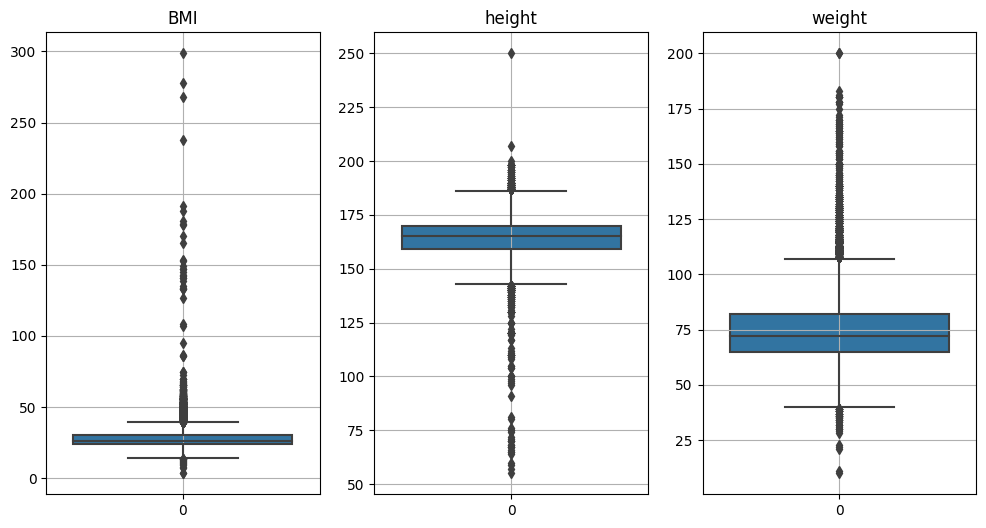

In [167]:
# boxplots to show outliers in BMI, height and weight
fig, axes = plt.subplots(1,3, figsize=(12,6))

title = ["BMI", "height", "weight"]

for i, ax in enumerate(axes):
    sns.boxplot(df[title[i]], ax=ax).set(title=title[i])
    ax.grid()

Here we can see the varius outliers. For BMI it is primarily to high, for height its mostly too low and for weight too high. Because of the calculation for BMI low height and high weight would give high BMI. Note that not all of the outliers indicate a false mesurement as it is very possible for a few people to be around 2m in the dataset.

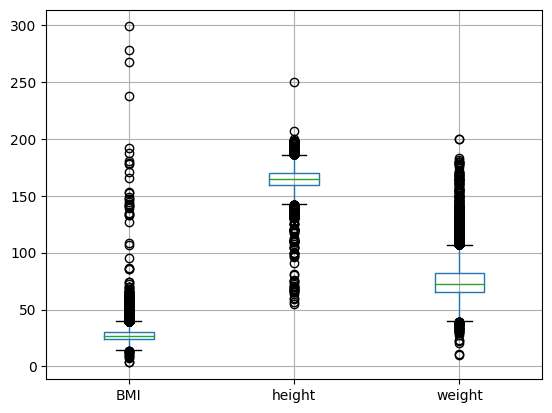

In [168]:
# Using pandas boxplot to get the values from the boxplots
box_data = df.boxplot(column=title, return_type="dict")

# contains all outlier points
outliers = [flier.get_ydata() for flier in box_data["fliers"]]
# contains the box range
boxes = [box.get_ydata() for box in box_data["boxes"]]
# contains the whiskers range
whiskers = [whiskers.get_ydata() for whiskers in box_data["whiskers"]]

In [169]:
# upper - lower whisker range
print(f"BMI whiskers{whiskers[0:2]}")
print(f"height whiskers{whiskers[2:4]}")
print(f"weight whiskers{whiskers[4:]}")

BMI whiskers[array([23.87511478, 14.47950008]), array([30.22222222, 39.73612129])]
height whiskers[array([159., 143.]), array([170., 186.])]
weight whiskers[array([65., 40.]), array([ 82., 107.])]


In [170]:
# range of the boxes
print(f"BMI box range{boxes[0][-2:]}")
print(f"Height box range{boxes[1][-2:]}")
print(f"weight box range{boxes[2][-2:]}")

BMI box range[30.22222222 23.87511478]
Height box range[170. 159.]
weight box range[82. 65.]


In [171]:
# gets the lowest and highest limits for the boxplot whiskers
lowest, highest = whiskers[0][1], whiskers[1][1]
lowest, highest

(14.479500076207893, 39.73612129161683)

This is the BMI range table I will use to filter BMI. The values from the box whiskers fits well with this table. However since I want to have some values within obesity class III I'm going to raise the cutof limit for high values by 5. For this assignment I'm less interessted in low BMI as I'm suppose to filter by normal to obesity class III BMI ranges but I will also add underweight to not cut out that much data.

| BMI Category | BMI Range   |
|--------------|-------------|
| Severe underweight       | < 15.0      |
| Moderate underweight     | 15.0 - 15.9 |
| Mild underweight         | 16.0 - 18.4 |
| Underweight  | < 18.5      |
| Normal weight| 18.5 - 24.9 |
| Overweight   | 25 - 29.9   |
| Obesity class I | 30 - 34.9 |
| Obesity class II | 35 - 39.9 |
| Obesity class III | >= 40    |

In [172]:
df.drop(df.query("BMI < 14 | BMI > 45").index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69378,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69379,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69380,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [173]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000,69382.000000
mean,49976.138264,53.335895,1.351201,164.473812,73.813622,128.739860,96.400666,1.364720,1.224424,0.088380,0.053789,0.803825,0.498198,27.311320
std,28850.558571,6.761030,0.477349,7.844844,13.586708,154.677809,188.491061,0.678599,0.570033,0.283849,0.225603,0.397105,0.500000,4.868281
min,0.000000,29.583562,1.000000,120.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.479500
25%,25012.250000,48.386301,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50008.500000,53.978082,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488
75%,74889.750000,58.424658,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.103806
max,99999.000000,64.967123,2.000000,207.000000,149.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,44.997166


In [174]:
def BMI_categorys(BMI):
    if BMI < 18.5:
        return "underweight"
    elif BMI >= 18.5 and BMI < 25:
        return "normal range"
    elif BMI >= 25 and BMI < 30:
        return "overweight"
    elif BMI >= 30 and BMI < 35:
        return "obese (class I)"
    elif BMI >= 35 and BMI < 40:
        return "obese (class II)"
    else:
        return "obese (class III)"
    

df["BMI_class"] = df["BMI"].apply(BMI_categorys)

In [175]:
df["BMI_class"].unique()

array(['normal range', 'obese (class I)', 'overweight',
       'obese (class II)', 'underweight', 'obese (class III)'],
      dtype=object)

In [176]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,overweight
69378,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,overweight
69379,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,obese (class I)
69380,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,overweight


## Feature engineering bloodpressure

In [177]:
df["ap_hi"].describe()

count    69382.000000
mean       128.739860
std        154.677809
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [178]:
df["ap_lo"].describe()

count    69382.000000
mean        96.400666
std        188.491061
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

Here we can see that there are some impossible extremes that need to be removed such as a negative blood pressure or a blood pressure in the thousands

In [179]:
df.query("ap_hi < 20")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
560,815,58.304110,1,168,78.0,14,90,2,1,0,0,1,1,27.636054,overweight
917,1294,59.909589,2,175,70.0,14,90,3,1,0,0,1,1,22.857143,normal range
968,1360,49.931507,1,172,65.0,11,80,1,3,0,0,1,0,21.971336,normal range
1581,2260,52.605479,1,165,66.0,12,80,1,1,0,0,1,0,24.242424,normal range
1608,2301,61.893151,1,165,71.0,14,80,1,1,0,0,1,1,26.078972,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68020,98039,58.128767,1,160,59.0,12,80,1,1,0,0,1,0,23.046875,normal range
68132,98213,51.383562,1,158,74.0,14,90,1,1,0,0,1,1,29.642685,overweight
68384,98568,52.347945,1,154,77.0,14,90,1,1,0,0,1,0,32.467532,obese (class I)
68521,98743,42.306849,2,176,65.0,12,80,1,1,0,0,1,0,20.983988,normal range


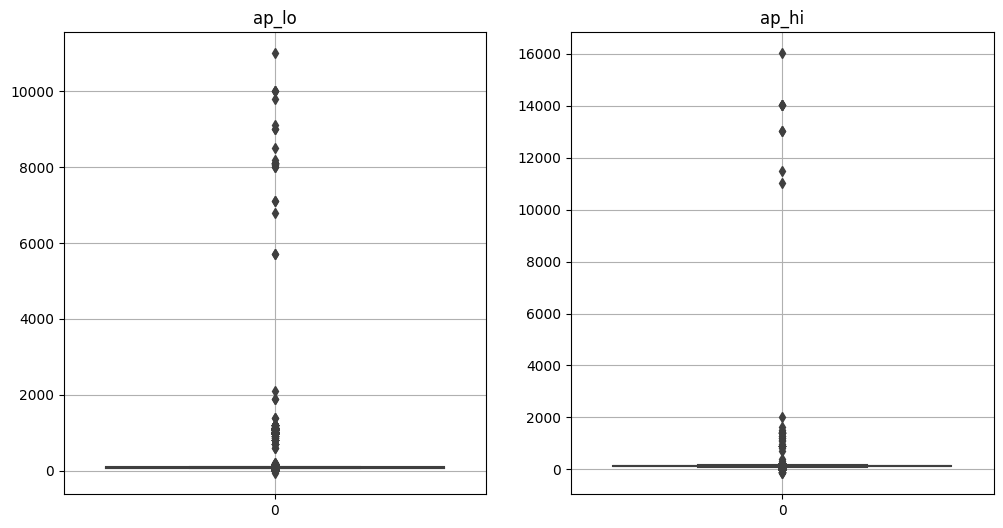

In [180]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

title = ["ap_lo", "ap_hi"]

for i, ax in enumerate(axes):
    sns.boxplot(df[title[i]], ax=ax).set(title=title[i])
    ax.grid()

Trying to make a box plot for ap_lo and ap_high but the results become hard to use because of the extreme extremes so have to remove impossible values before plotting

In [181]:
# remove impossible lows
df.drop(df.query("ap_hi < 70 | ap_lo < 60").index, inplace=True)
# remove impossible highs
df.drop(df.query("ap_hi > 220 | ap_lo > 200").index, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,overweight
69378,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,overweight
69379,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,obese (class I)
69380,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,overweight


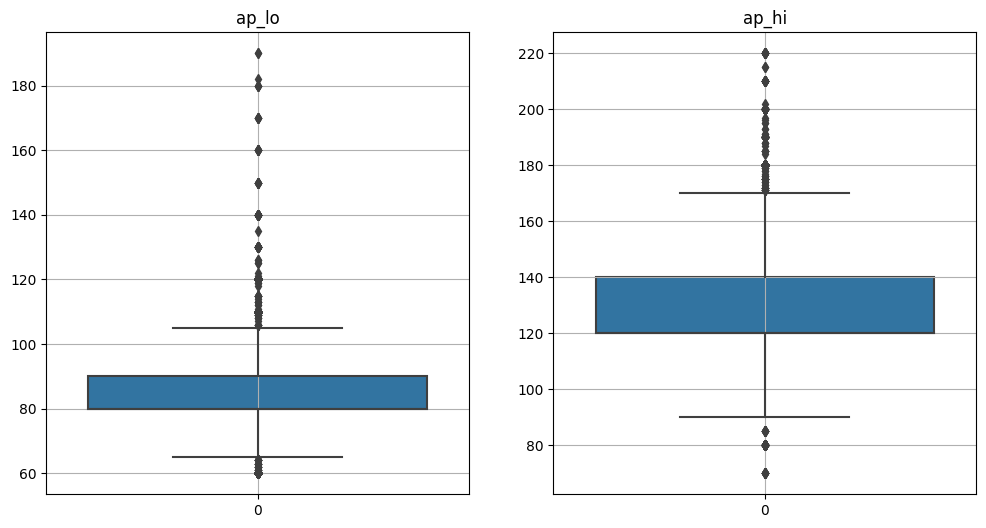

In [182]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

title = ["ap_lo", "ap_hi"]

for i, ax in enumerate(axes):
    sns.boxplot(df[title[i]], ax=ax).set(title=title[i])
    ax.grid()

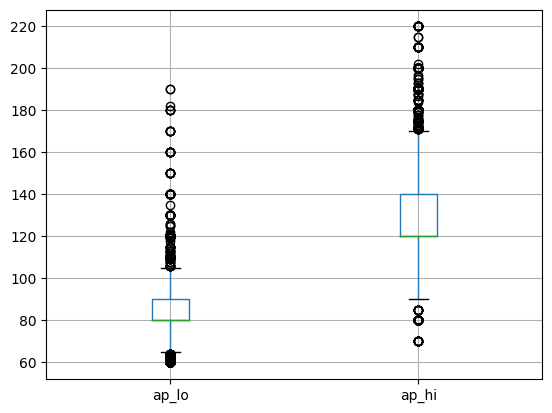

In [183]:
# doing the same as I did with the BMI plot
# Using pandas boxplot to get the values from the boxplots
box_data = df.boxplot(column=title, return_type="dict")

# contains all outlier points
outliers = [flier.get_ydata() for flier in box_data["fliers"]]
# contains the box range
boxes = [box.get_ydata() for box in box_data["boxes"]]
# contains the whiskers range
whiskers = [whiskers.get_ydata() for whiskers in box_data["whiskers"]]

In [184]:
# print whiskers to find good limiter points
print(f"Diastolic whiskers limits low:{whiskers[0][1]}, high:{whiskers[1][1]}")
print(f"Systolic whiskers limits low:{whiskers[2][1]}, high:{whiskers[3][1]}")

Diastolic whiskers limits low:65.0, high:105.0
Systolic whiskers limits low:90.0, high:170.0


In [185]:
# print the mean for outliers to se if they are more high or low
print(f"Mean for diastolic outliers: {outliers[0].mean()}")
print(f"Mean for Systolic outliers: {outliers[1].mean()}")

Mean for diastolic outliers: 71.68316831683168
Mean for Systolic outliers: 172.52683896620277


In [186]:
# print the box range for both boxes
print(f"Diastolic box range {boxes[0][-2:]}")
print(f"Systolic box range {boxes[1][-2:]}")

Diastolic box range [90. 80.]
Systolic box range [140. 120.]


| Blood pressure Category | Systolic | Diastolic |
|--------------|-------------|-------------|
| Healthy       | < 120 | < 80 |
| Elevated     | 120 - 129 | < 80 |
| Stage 1 hypertension | 130-139 | 80-89 |
| Stage 2 hypertension  | 140-180 | 90-120 |
| Hypertension crisis | > 180 | > 120 |

with this medical data being above the highest would indicate a medical emergency and the filter should there fore not be to high. But adjust to keep some data above the whiskers to get the hypertension crisis category. Since low values indicate healthy and are within the table remove values according to boxplot

In [187]:
# drops the high values based on table and boxplot
df.drop(df.query("ap_lo > 140 | ap_hi > 200").index, inplace=True)
# drop lows based on boxplot
df.drop(df.query("ap_lo < 65 | ap_hi < 90").index, inplace=True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,overweight
69378,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,overweight
69379,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,obese (class I)
69380,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,overweight


In [188]:
def blood_pressure_categorys(low, high):
    if low < 80 and high < 120:
        return "healthy"
    elif low < 80 and 120 <= high < 130:
        return "elevated"
    elif 80 <= low < 90 or 130 <= high < 140:
        return "stage 1 hypertension"
    elif 90 <= low < 120 or 140 <= high < 180:
        return "stage 2 hypertension"
    else:
        return "hypertension crisis"
    

df["blood_pressure"] = df.apply(lambda x: blood_pressure_categorys(x.ap_lo, x.ap_hi), axis=1)

In [189]:
df["blood_pressure"].unique()

array(['stage 1 hypertension', 'stage 2 hypertension', 'healthy',
       'elevated', 'hypertension crisis'], dtype=object)

In [190]:
df["blood_pressure"].value_counts()

stage 1 hypertension    39413
stage 2 hypertension    15717
healthy                  7333
elevated                 2615
hypertension crisis       121
Name: blood_pressure, dtype: int64

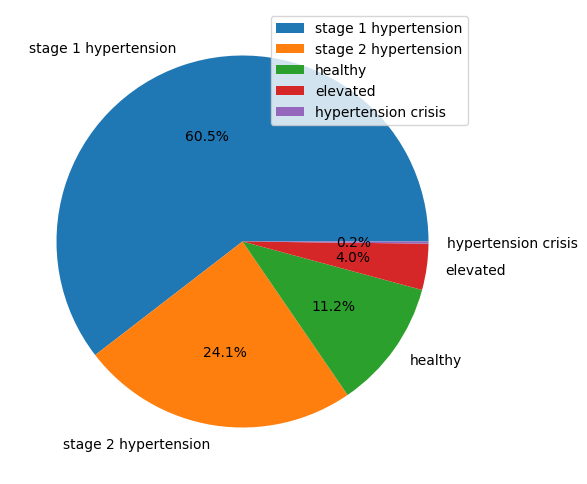

In [191]:
fig = plt.subplots(figsize=(6,12))
plt.pie(df["blood_pressure"].value_counts(),labels=df["blood_pressure"].unique(), autopct="%1.1f%%")
plt.legend(loc="upper right")

## Visuals number of disease

In [192]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class,blood_pressure
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range,stage 1 hypertension
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I),stage 2 hypertension
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range,stage 1 hypertension
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight,stage 2 hypertension
5,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,overweight,stage 1 hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,overweight,stage 1 hypertension
69378,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,overweight,stage 1 hypertension
69379,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,obese (class I),stage 2 hypertension
69380,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,overweight,stage 1 hypertension


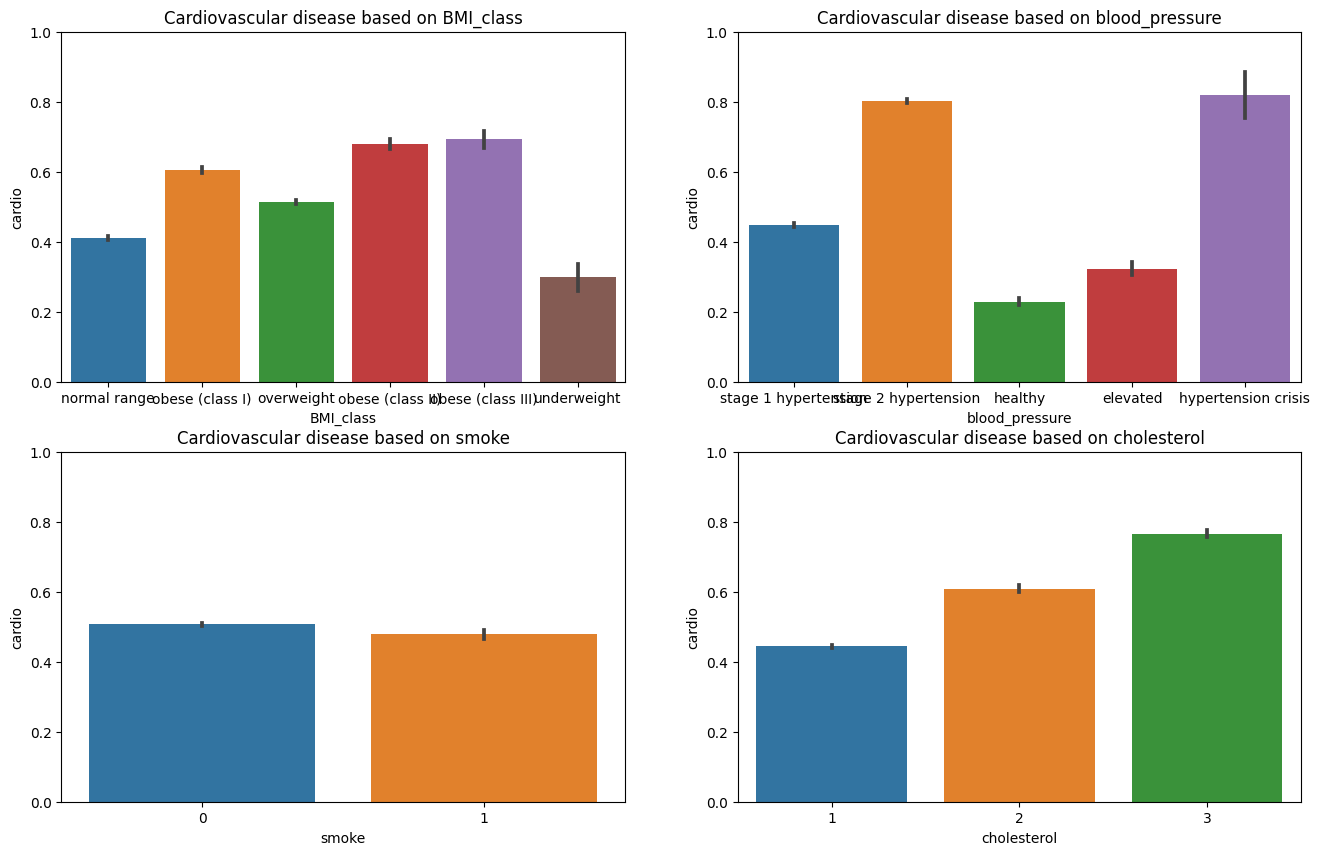

In [193]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

labels = ["BMI_class", "blood_pressure", "smoke", "cholesterol"]

# TODO: maybe fix xvalue labels
for label, ax in zip(labels, axes.flatten()):
    sns.barplot(df, x=label, y="cardio", ax=ax)
    ax.set_title(f"Cardiovascular disease based on {label}")
    ax.set_ylim(0,1)

## Visual correlation

### Note:

the BMI class column and blood pressure column will not be used in the correlation graph as they are strings. This could be fixed by assigning them numerical values. However this is not necessary since they are calculated from other numerical data in the dataset that will show correlation.

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_6156\1559398015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt="0.2f")


<Axes: >

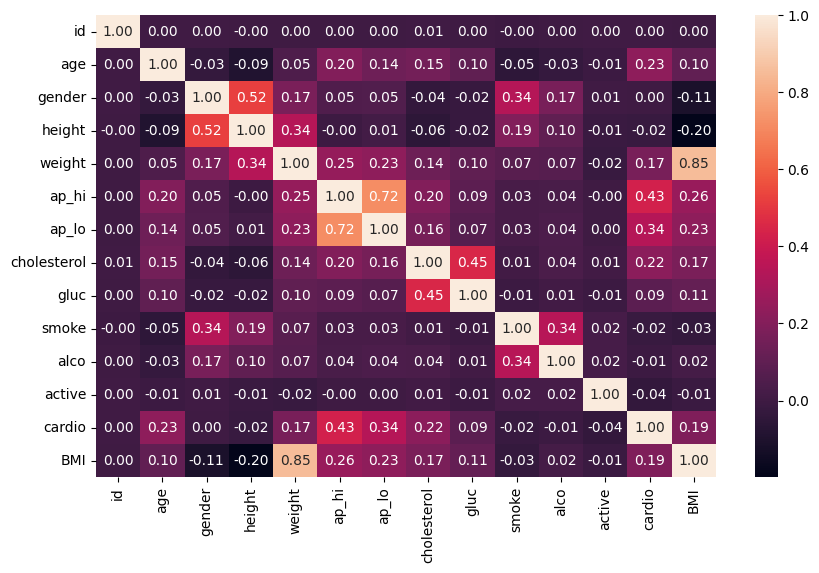

In [194]:
fig = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt="0.2f")

- age -> cardio: young people have less risk of heart problems *
- gender -> height: men are taller than women on average
- gender -> smoke: more men smoke than women
- height -> weight: taller people weigh more 
- height/weight -> bmi: used to calc bmi
- weight -> ap_hi/ap_lo: heavier people have higher blood pressure *
- ap_hi -> ap_lo: both are blood pressure
- ap_hi/ap_lo -> cardio: high blood pressure increases risk of heart problems *
- cholesterol -> gluc: high sugar leads to extra fat *
- cholesterol -> cardio: high fat leads to heart problems *
- smoke does not corr cardio wonder why?
- smoke -> alco: people who drink are more likely to smoke

## Create two datasets

In [195]:
# make new dataframes without specific columns
df1 = df.drop(["ap_hi", "ap_lo", "height", "weight", "BMI"], axis=1)
df2 = df.drop(["BMI_class", "blood_pressure", "height", "weight"], axis=1)

df1 = pd.get_dummies(df1, columns= ["BMI_class", "blood_pressure", "gender"])
df2 = pd.get_dummies(df2, columns=["gender"])

In [196]:
df1

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_class_normal range,BMI_class_obese (class I),...,BMI_class_obese (class III),BMI_class_overweight,BMI_class_underweight,blood_pressure_elevated,blood_pressure_healthy,blood_pressure_hypertension crisis,blood_pressure_stage 1 hypertension,blood_pressure_stage 2 hypertension,gender_1,gender_2
0,0,50.391781,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,55.419178,3,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,51.663014,3,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3,48.282192,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,8,60.038356,2,2,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
69378,99993,52.712329,1,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
69379,99996,52.235616,3,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
69380,99998,61.454795,1,2,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [197]:
df2

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_1,gender_2
0,0,50.391781,110,80,1,1,0,0,1,0,21.967120,0,1
1,1,55.419178,140,90,3,1,0,0,1,1,34.927679,1,0
2,2,51.663014,130,70,3,1,0,0,0,1,23.507805,1,0
3,3,48.282192,150,100,1,1,0,0,1,1,28.710479,0,1
5,8,60.038356,120,80,2,2,0,0,0,0,29.384676,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69377,99992,57.736986,150,80,1,1,0,0,1,1,29.384757,1,0
69378,99993,52.712329,120,80,1,1,1,0,1,0,26.927438,0,1
69379,99996,52.235616,180,90,3,1,0,1,0,1,31.353579,0,1
69380,99998,61.454795,135,80,1,2,0,0,0,1,27.099251,1,0


## pick model

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### splitting both dataframes into train|val|test

In [199]:
X, y = df1.drop("cardio", axis=1), df1["cardio"]

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train_1.shape, X_test_1.shape, X_val_1.shape, y_train_1.shape, y_test_1.shape, y_val_1.shape

((52159, 20), (6520, 20), (6520, 20), (52159,), (6520,), (6520,))

In [200]:
X, y = df2.drop("cardio", axis=1), df1["cardio"]

X_train_2, X_test, y_train_2, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train_2.shape, X_test_2.shape, X_val_2.shape, y_train_2.shape, y_test_2.shape, y_val_2.shape

((52159, 12), (6520, 12), (6520, 12), (52159,), (6520,), (6520,))

In [201]:
standard_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

### Function to test models

In [202]:
def model_tester(scaler:tuple, model:tuple, param_grid, scoring, data: tuple):

    pipe = Pipeline([scaler, model])

    classifier = GridSearchCV(
        estimator=pipe, param_grid=param_grid, cv=5, scoring=scoring
    )

    classifier.fit(data[0],data[1])
    print(classifier.best_score_)
    print(classifier.best_params_)
    print("-"*50)

    return classifier

### First dataset with both scalers

In [203]:
param_grid_RF = {"rf__n_estimators": [100, 150, 200], "rf__max_depth": [5, 10, 15]}

RF_standard_1 = model_tester(("scaler", standard_scaler), ("rf", RandomForestClassifier()), param_grid_RF, "accuracy", (X_train_1, y_train_1))
RF_mm_1 = model_tester(("scaler", mm_scaler), ("rf", RandomForestClassifier()), param_grid_RF, "accuracy", (X_train_1, y_train_1))

0.7008185601642815
{'rf__max_depth': 10, 'rf__n_estimators': 200}
--------------------------------------------------
0.7003201012584598
{'rf__max_depth': 10, 'rf__n_estimators': 100}
--------------------------------------------------


In [204]:
param_grid_KNN = {"knn__n_neighbors": list(range(35, 55))}

KNN_standard_1 = model_tester(("scaler", standard_scaler), ("knn", KNeighborsClassifier()), param_grid_KNN, "accuracy", (X_train_1, y_train_1))
KNN_mm_1 = model_tester(("scaler", mm_scaler), ("knn", KNeighborsClassifier()), param_grid_KNN, "accuracy", (X_train_1, y_train_1))

0.6928621927883674
{'knn__n_neighbors': 53}
--------------------------------------------------
0.6926129026827185
{'knn__n_neighbors': 54}
--------------------------------------------------


In [205]:
param_grid_log = {"log__penalty": ["l1","l2"], "log__solver": ["saga", "liblinear"], "log__max_iter": [50, 100, 200, 500]}

log_standard_1 = model_tester(("scaler", standard_scaler), ("log", LogisticRegression()), param_grid_log, "accuracy", (X_train_1, y_train_1))
log_mm_1 = model_tester(("scaler", mm_scaler), ("log", LogisticRegression()), param_grid_log, "accuracy", (X_train_1, y_train_1))

c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\li

0.6978661061765514
{'log__max_iter': 50, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
--------------------------------------------------


c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\li

0.6978277662941927
{'log__max_iter': 50, 'log__penalty': 'l2', 'log__solver': 'saga'}
--------------------------------------------------


c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### second dataset with both scalers

In [212]:
param_grid_RF = {"rf__n_estimators": [100, 150, 200], "rf__max_depth": [5, 10, 15]}

RF_standard_2 = model_tester(("scaler", standard_scaler), ("rf", RandomForestClassifier()), param_grid_RF, "accuracy", (X_train_2, y_train_2))
RF_mm_2 = model_tester(("scaler", mm_scaler), ("rf", RandomForestClassifier()), param_grid_RF, "accuracy", (X_train_2, y_train_2))

0.7319924667093661
{'rf__max_depth': 10, 'rf__n_estimators': 150}
--------------------------------------------------
0.7321074826805187
{'rf__max_depth': 10, 'rf__n_estimators': 200}
--------------------------------------------------


In [207]:
param_grid_KNN = {"knn__n_neighbors": list(range(35, 55))}

KNN_standard_2 = model_tester(("scaler", standard_scaler), ("knn", KNeighborsClassifier()), param_grid_KNN, "accuracy", (X_train_2, y_train_2))
KNN_mm_2 = model_tester(("scaler", mm_scaler), ("knn", KNeighborsClassifier()), param_grid_KNN, "accuracy", (X_train_2, y_train_2))

0.7263367073164995
{'knn__n_neighbors': 53}
--------------------------------------------------
0.7206808891088561
{'knn__n_neighbors': 47}
--------------------------------------------------


In [208]:
param_grid_log = {"log__penalty": ["l1","l2"], "log__solver": ["saga", "liblinear"], "log__max_iter": [50, 100, 200, 500]}

log_standard_2 = model_tester(("scaler", standard_scaler), ("log", LogisticRegression()), param_grid_log, "accuracy", (X_train_2, y_train_2))
log_mm_2 = model_tester(("scaler", mm_scaler), ("log", LogisticRegression()), param_grid_log, "accuracy", (X_train_2, y_train_2))

0.7248412625944491
{'log__max_iter': 100, 'log__penalty': 'l2', 'log__solver': 'saga'}
--------------------------------------------------


c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Rasmus\.virtualenvs\Machine-learning-Rasmus-Johansson-C-TUgvqA\lib\site-packages\sklearn\linear_model\_sag.py

0.7250138159585662
{'log__max_iter': 50, 'log__penalty': 'l2', 'log__solver': 'liblinear'}
--------------------------------------------------


## best results

model: randomforest, scaler: standard scaler, data: dataset 2

In [217]:
from sklearn.metrics import accuracy_score

y_pred = RF_standard_2.predict(X_val_2)
print("Accuracy score for Randomforest prediction", accuracy_score(y_val_2, y_pred))
y_pred = KNN_standard_2.predict(X_val_2)
print("Accuracy score for KNN prediction", accuracy_score(y_val_2, y_pred))
y_pred = log_mm_2.predict(X_val_2)
print("Accuracy score for Logistic regression prediction", accuracy_score(y_val_2, y_pred))

Accuracy score for Randomforest prediction 0.7326687116564418
Accuracy score for KNN prediction 0.7245398773006135
Accuracy score for Logistic regression prediction 0.7288343558282209


In [220]:
RF_standard_2.best_params_

{'rf__max_depth': 10, 'rf__n_estimators': 150}

### prediction trained on full data

In [222]:

X_train_full = pd.concat([X_train_2, X_val_2])
y_train_full = pd.concat([y_train_2, y_val_2])

RF_model = Pipeline([("scaler", standard_scaler), ("rf", RandomForestClassifier(max_depth=10, n_estimators=150))])
RF_model.fit(X_train_full, y_train_full)
y_pred = RF_model.predict(X_test_2)

print("Accuracy score on full data:", accuracy_score(y_test_2, y_pred))

Accuracy score on full data: 0.7282208588957055
